In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [5]:
df = pd.read_csv('features.csv')

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'model', 'model_year', 'milage',
       'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident',
       'clean_title', 'price', 'age', 'brand_enc', 'brand_avg', 'mod_avg',
       'is_luxury', 'fuel_type_enc', 'is_electric', 'hp', 'Cyl', 'engine_size',
       'simp_trans', 'simp_trans_enc', 'speeds', 'simp_ext_col', 'ext_col_enc',
       'simp_int_col', 'int_col_enc', 'acc_enc', 'clean_title_enc'],
      dtype='object')

In [8]:
# creating interactions
df['true_engine'] = df['hp'] * df['Cyl'] * df['engine_size']

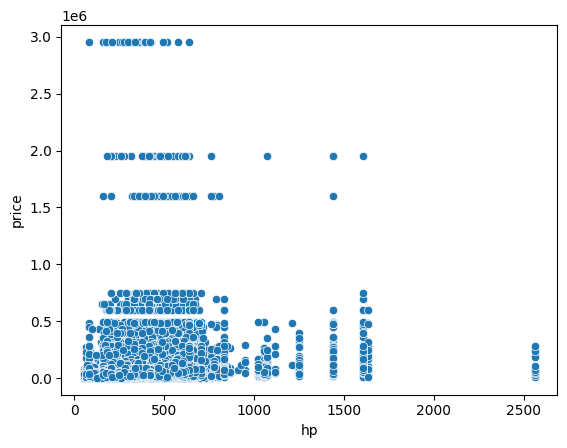

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df, x = 'hp', y='price')
plt.show()

In [10]:
# features = ['model_year', 'milage', 'brand_enc', 'mod_avg','fuel_type_enc', 'is_electric', 'hp', 'Cyl', 'engine_size', 'simp_trans_enc', 'speeds', 'ext_col_enc', 'int_col_enc', 'acc_enc', 'clean_title_enc']
features = ['age', 'is_luxury', 'milage', 'brand_enc','fuel_type_enc', 'is_electric', 'true_engine', 'simp_trans_enc','ext_col_enc', 'int_col_enc', 'acc_enc', 'clean_title_enc']

In [11]:
scale = StandardScaler()
# X = scale.fit_transform(X)

for x in features:
    df[x] = scale.fit_transform(df[[x]])
    
    
X = df[features]
Y = df['price']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [14]:
lr_r2, lr_rm = r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

lr_r2, lr_rm

(0.11674439618593291, 70084.97983620616)

In [15]:
tree = DecisionTreeRegressor()

tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [16]:
tr_r2, tr_rm = r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

tr_r2, tr_rm

(-0.7425319597452908, 98440.11856121536)

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

rf_r2, rf_rm = r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

rf_r2, rf_rm

(0.05204498460092577, 72606.51909818639)

In [18]:
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'features': X.columns,
    'importance': feature_importance
})

importance_df = importance_df.sort_values(by='importance', ascending=False)

importance_df

,features,importance
2,milage,0.404129
6,true_engine,0.138851
0,age,0.130782
8,ext_col_enc,0.096358
3,brand_enc,0.064007
9,int_col_enc,0.063188
7,simp_trans_enc,0.034351
11,clean_title_enc,0.028904
10,acc_enc,0.013402
1,is_luxury,0.012375


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)

grb_r2, gbr_rm = r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

grb_r2, gbr_rm

(0.16189108223500692, 68270.32696986511)

In [20]:
cat_df = pd.read_csv('features.csv')
cat_df[['is_electric', 'is_luxury', 'speeds']] = cat_df[['is_electric', 'is_luxury', 'speeds']].astype(int)

In [21]:
from catboost import CatBoostRegressor

for_cat = ['brand', 'model', 'milage', 'fuel_type', 'accident', 'clean_title', 'age', 'is_luxury', 'is_electric', 'hp', 'simp_trans', 'speeds', 'simp_ext_col', 'simp_int_col']

catX = cat_df[for_cat]

cat_features = ['brand', 'model', 'fuel_type', 'accident', 'clean_title', 'is_luxury', 'is_electric', 'simp_trans', 'speeds', 'simp_ext_col', 'simp_int_col']

catx_train, catx_test, caty_train, caty_test = train_test_split(catX, Y, test_size=0.2, random_state=42)

cat_mod = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=2)

cat_mod.fit(catx_train, caty_train, cat_features=cat_features)

y_pred = cat_mod.predict(catx_test)

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


0:	learn: 78968.2341679	total: 1.2s	remaining: 20m 3s
2:	learn: 77614.0496281	total: 2.47s	remaining: 13m 41s
4:	learn: 76628.4586725	total: 3.98s	remaining: 13m 13s
6:	learn: 75896.5866805	total: 5.44s	remaining: 12m 51s
8:	learn: 75392.3190092	total: 7.42s	remaining: 13m 36s
10:	learn: 75029.0050035	total: 9.02s	remaining: 13m 30s
12:	learn: 74762.6412993	total: 9.99s	remaining: 12m 38s
14:	learn: 74587.4380705	total: 11.1s	remaining: 12m 9s
16:	learn: 74443.3529832	total: 12.2s	remaining: 11m 46s
18:	learn: 74335.2818466	total: 13.6s	remaining: 11m 43s
20:	learn: 74276.5052876	total: 15s	remaining: 11m 40s
22:	learn: 74199.2985301	total: 16.1s	remaining: 11m 21s
24:	learn: 74140.7427589	total: 16.9s	remaining: 10m 57s
26:	learn: 74103.2982100	total: 17.8s	remaining: 10m 43s
28:	learn: 74068.6082848	total: 18.5s	remaining: 10m 19s
30:	learn: 74046.9645395	total: 19s	remaining: 9m 53s
32:	learn: 74033.4296008	total: 19.6s	remaining: 9m 34s
34:	learn: 74011.9162831	total: 20.5s	remaini

In [22]:
from sklearn.model_selection import GridSearchCV

cat = CatBoostRegressor(verbose=0)

# params = {
#     # 'iterations':[500, 1000, 1500],
#     # 'depth':[6, 8, 10],
#     'learning_rate':[0.01, 0.05, 0.1],
#     'l2_leaf_reg':[1, 3, 5, 7]
# }

# cat_grid = GridSearchCV(cat, params, cv=4, scoring='neg_root_mean_squared_error')

# cat_grid.fit(x_train, y_train, cat_features=cat_features, verbose=2)

In [23]:
# cat_grid.best_params_

In [24]:
# cat_best = cat_grid.best_estimator_
cat_best = CatBoostRegressor(l2_leaf_reg=1, learning_rate=0.01, verbose=0)

In [25]:
cat_best.fit(catx_train, caty_train, cat_features=cat_features)
y_pred = cat_best.predict(catx_test)

In [26]:
cat_r2, cat_rm = r2_score(caty_test, y_pred), root_mean_squared_error(caty_test, y_pred)
cat_r2, cat_rm

(0.16566454834316124, 68116.46487405563)

In [27]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate = 0.1, 
    max_depth = 5, 
    alpha = 10,
    n_estimators = 100
)

In [28]:
xg_reg.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [29]:
y_pred = xg_reg.predict(x_test)

r2_score(y_test, y_pred), root_mean_squared_error(y_test, y_pred)

(0.16326028108596802, 68214.53613400366)

In [30]:
from sklearn.svm import SVR

In [ ]:
# y_train_scaled = StandardScaler().fit_transform(y_train)
# y_test_scaled = StandardScaler().fit_transform(y_test)

In [32]:
pred_xbg = xg_reg.predict(x_test)
pred_cat = cat_best.predict(catx_test)
pred_gbr = gbr.predict(x_test)

lb  = [0.5, 0.25, 0.25]

final_pred = (lb[0] * pred_xbg + lb[1] * pred_cat + lb[2] * pred_gbr)

In [33]:
r2_score(y_test, final_pred), root_mean_squared_error(y_test, final_pred)

(0.16622517715642815, 68093.57571716492)

In [34]:
best_rmse = float('inf')
best_weights = None

for w1 in np.arange(0, 1.1, 0.1):
    for w2 in np.arange(0, 1.1 - w1, 0.1):
        w3 = 1 - w1 - w2
        final_pred = w1 * pred_xbg + w2 * pred_cat + w3 * pred_gbr
        rmse = root_mean_squared_error(y_test, final_pred)
        if rmse < best_rmse:
            best_rmse = rmse
            best_weights = (w1, w2, w3)

print(f"Best Weights: {best_weights}, Best RMSE: {best_rmse}")


Best Weights: (0.30000000000000004, 0.6000000000000001, 0.09999999999999987), Best RMSE: 68060.94827367229


In [35]:
test_df = pd.read_csv('test_features2.csv')
cat_test_df = pd.read_csv('test_features2.csv')

In [37]:

from catboost import Pool

test_df['true_engine'] = test_df['hp'] * test_df['Cyl'] * test_df['engine_size']

for x in features:
    test_df[x] = scale.fit_transform(test_df[[x]])

cat_test_df[['is_electric', 'is_luxury', 'speeds']] = cat_test_df[['is_electric', 'is_luxury', 'speeds']].astype(int)


x = test_df[features]
catX = cat_test_df[for_cat]

# cat_pool = Pool(data=catX, cat_features=cat_features)

pred_xbg = xg_reg.predict(x)
pred_cat = cat_best.predict(catX)
pred_gbr = gbr.predict(x)

lb = best_weights

final_pred = (lb[0] * pred_xbg + lb[1] * pred_cat + lb[2] * pred_gbr)

In [38]:
test_df['price'] = final_pred

In [40]:

submit = test_df[['id', 'price']].set_index('id')

In [41]:
submit.to_csv('submit.csv')